In [11]:
%matplotlib inline
import torch
from PIL import Image
from torch import nn
import matplotlib.pyplot as plt
import os
import random
from torchvision import transforms

In [13]:
DATA_DIR = 'lbl_data_resized/'
NROWS, NCOLS = 3, 3
SAMPLE_SIZE = NROWS * NCOLS

In [88]:
def display_ims(batch, nrows, ncols, title, figsize=(15, 15), save=True):
    fig, ax = plt.subplots(nrows, ncols, figsize=figsize)
    to_pil = transforms.ToPILImage()
    index = 0
    for i in range(nrows):
        for j in range(ncols):
            tensor = batch[index]
            index += 1
            image = to_pil(tensor.detach())
            ax[i, j].imshow(image)
            ax[i, j].set_xticks([])
            ax[i, j].set_yticks([])
    fig.suptitle(title)
    if save:
        plt.savefig(f'{title}.jpg')

In [5]:
img_names = os.listdir(DATA_DIR)

In [9]:
sample = random.sample(img_names, k=SAMPLE_SIZE)

In [20]:
tfms = transforms.Compose([
            transforms.Resize((224, 224)),
            transforms.ToTensor()
])

In [21]:
class SatelliteData(torch.utils.data.Dataset):
    def __init__(self, root, tfms):
        self.root = root
        self.tfms = tfms
        self.images = os.listdir(self.root)
    
    def load_pil(self, img_path):
        img = Image.open(img_path)
        img = img.convert('RGB')
        return img
    
    def __len__(self):
        return len(self.images)
    
    def __getitem__(self, index):
        img_name = self.images[index]
        img = self.load_pil(os.path.join(self.root, img_name))
        return tfms(img)

In [62]:
ds = SatelliteData(DATA_DIR, tfms)
dl = torch.utils.data.DataLoader(ds, batch_size=SAMPLE_SIZE, shuffle=True)

In [63]:
batch = next(iter(dl))

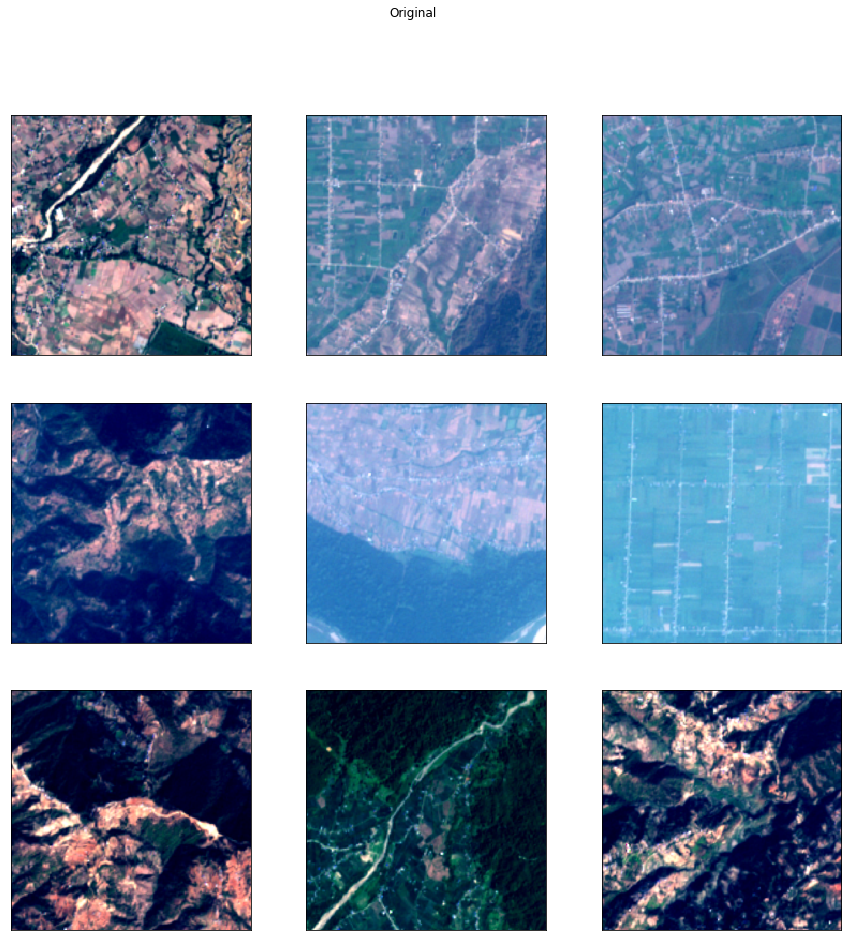

In [90]:
display_ims(batch, NROWS, NCOLS, 'Original')

In [91]:
dropout = nn.Dropout(0.2)

In [92]:
dropped_out = dropout(batch)

In [93]:
display_ims(dropped_out, NROWS, NCOLS, '20% Dropout')

In [94]:
droput2d = nn.Dropout2d(0.2)

In [95]:
dropped_out_2d = droput2d(batch)

In [96]:
display_ims(dropped_out_2d, NROWS, NCOLS, '20% Dropout2d')

In [97]:
dropout = nn.Dropout(0.1)

In [98]:
dropped_out = dropout(batch)

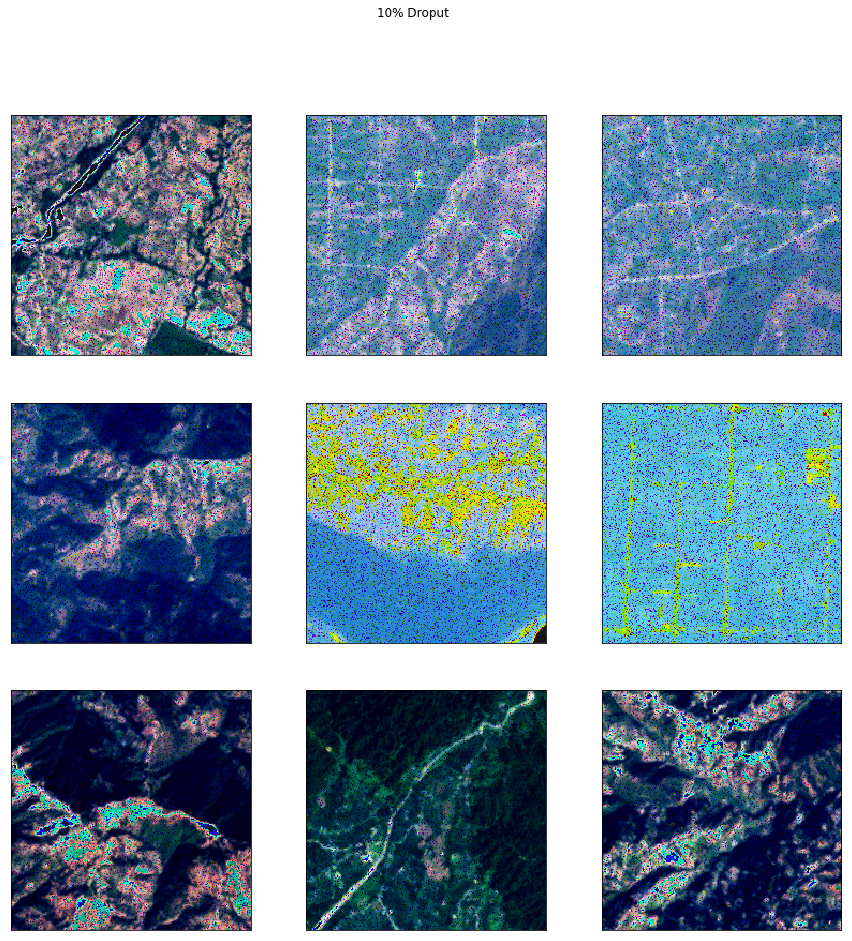

In [99]:
display_ims(dropped_out, NROWS, NCOLS, '10% Droput')

In [100]:
dropout = nn.Dropout(0.05)

In [101]:
dropped_out = dropout(batch)

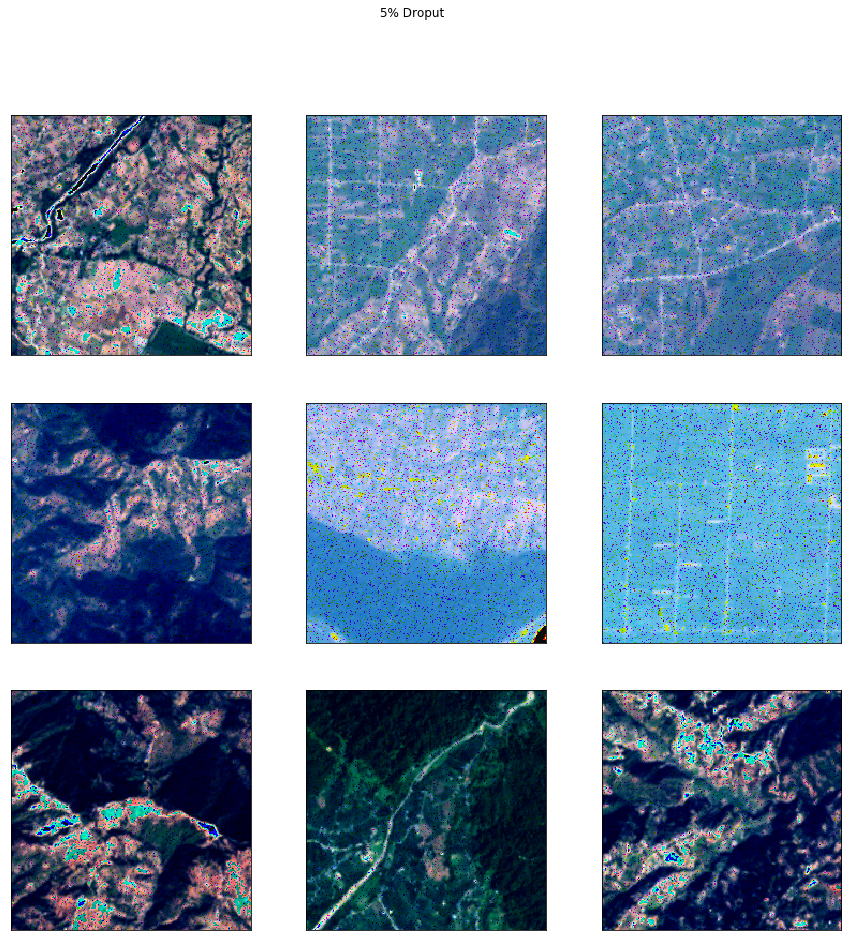

In [102]:
display_ims(dropped_out, NROWS, NCOLS, '5% Droput')

In [103]:
droput2d = nn.Dropout2d(0.05)

In [104]:
dropped_out = droput2d(batch)

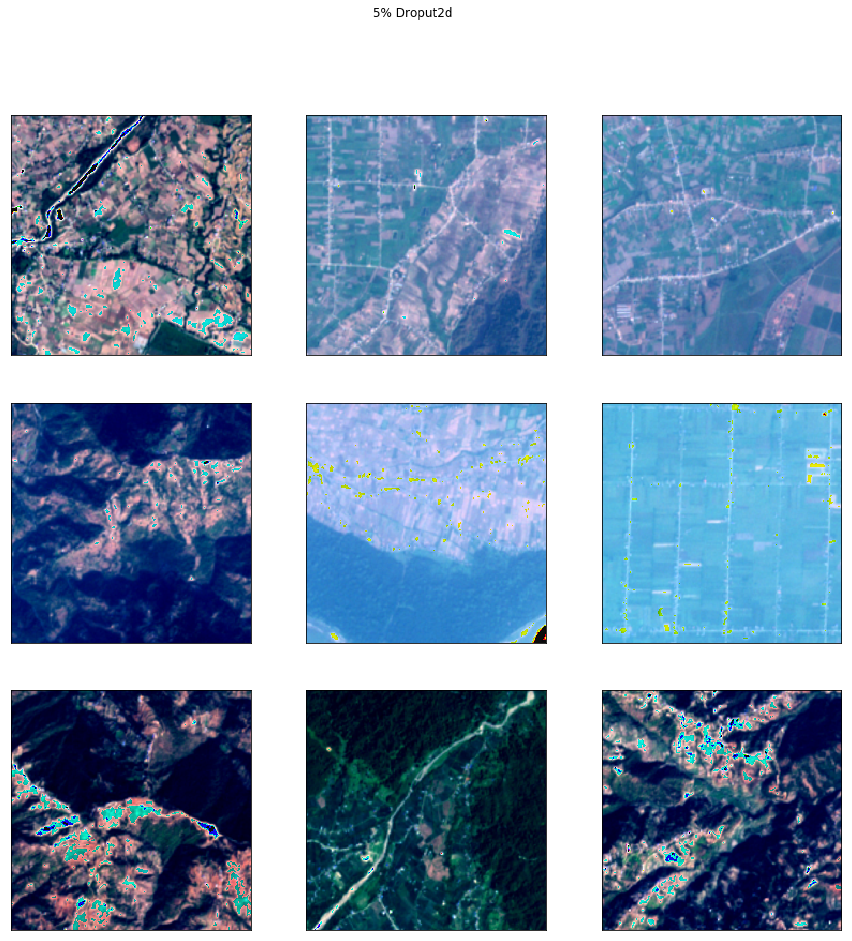

In [105]:
display_ims(dropped_out, NROWS, NCOLS, '5% Droput2d')